In [4]:
import pandas as pd

df = pd.read_csv("Current_Results.csv", index_col=0)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,bit_i,time_per_seu_(s)
0,"(0, 0, 214)",0.7608,class_token,0.017666,-0.017666,0,-9.584229
1,"(0, 0, 311)",0.7608,class_token,-0.000732,0.000732,0,-9.584229
2,"(0, 0, 402)",0.7608,class_token,-0.000930,0.000930,0,-9.584229
3,"(0, 0, 436)",0.7602,class_token,0.008094,-0.008094,0,-9.584229
4,"(0, 0, 497)",0.7608,class_token,0.000429,-0.000429,0,-9.584229
...,...,...,...,...,...,...,...
10,"(659,)",0.7608,heads.head.bias,0.000676,-0.000676,0,-10.592669
11,"(777,)",0.7608,heads.head.bias,-0.009027,0.009027,0,-10.592669
12,"(900,)",0.7608,heads.head.bias,-0.032361,0.032361,0,-10.592669
13,"(902,)",0.7608,heads.head.bias,0.020700,-0.020700,0,-10.592669


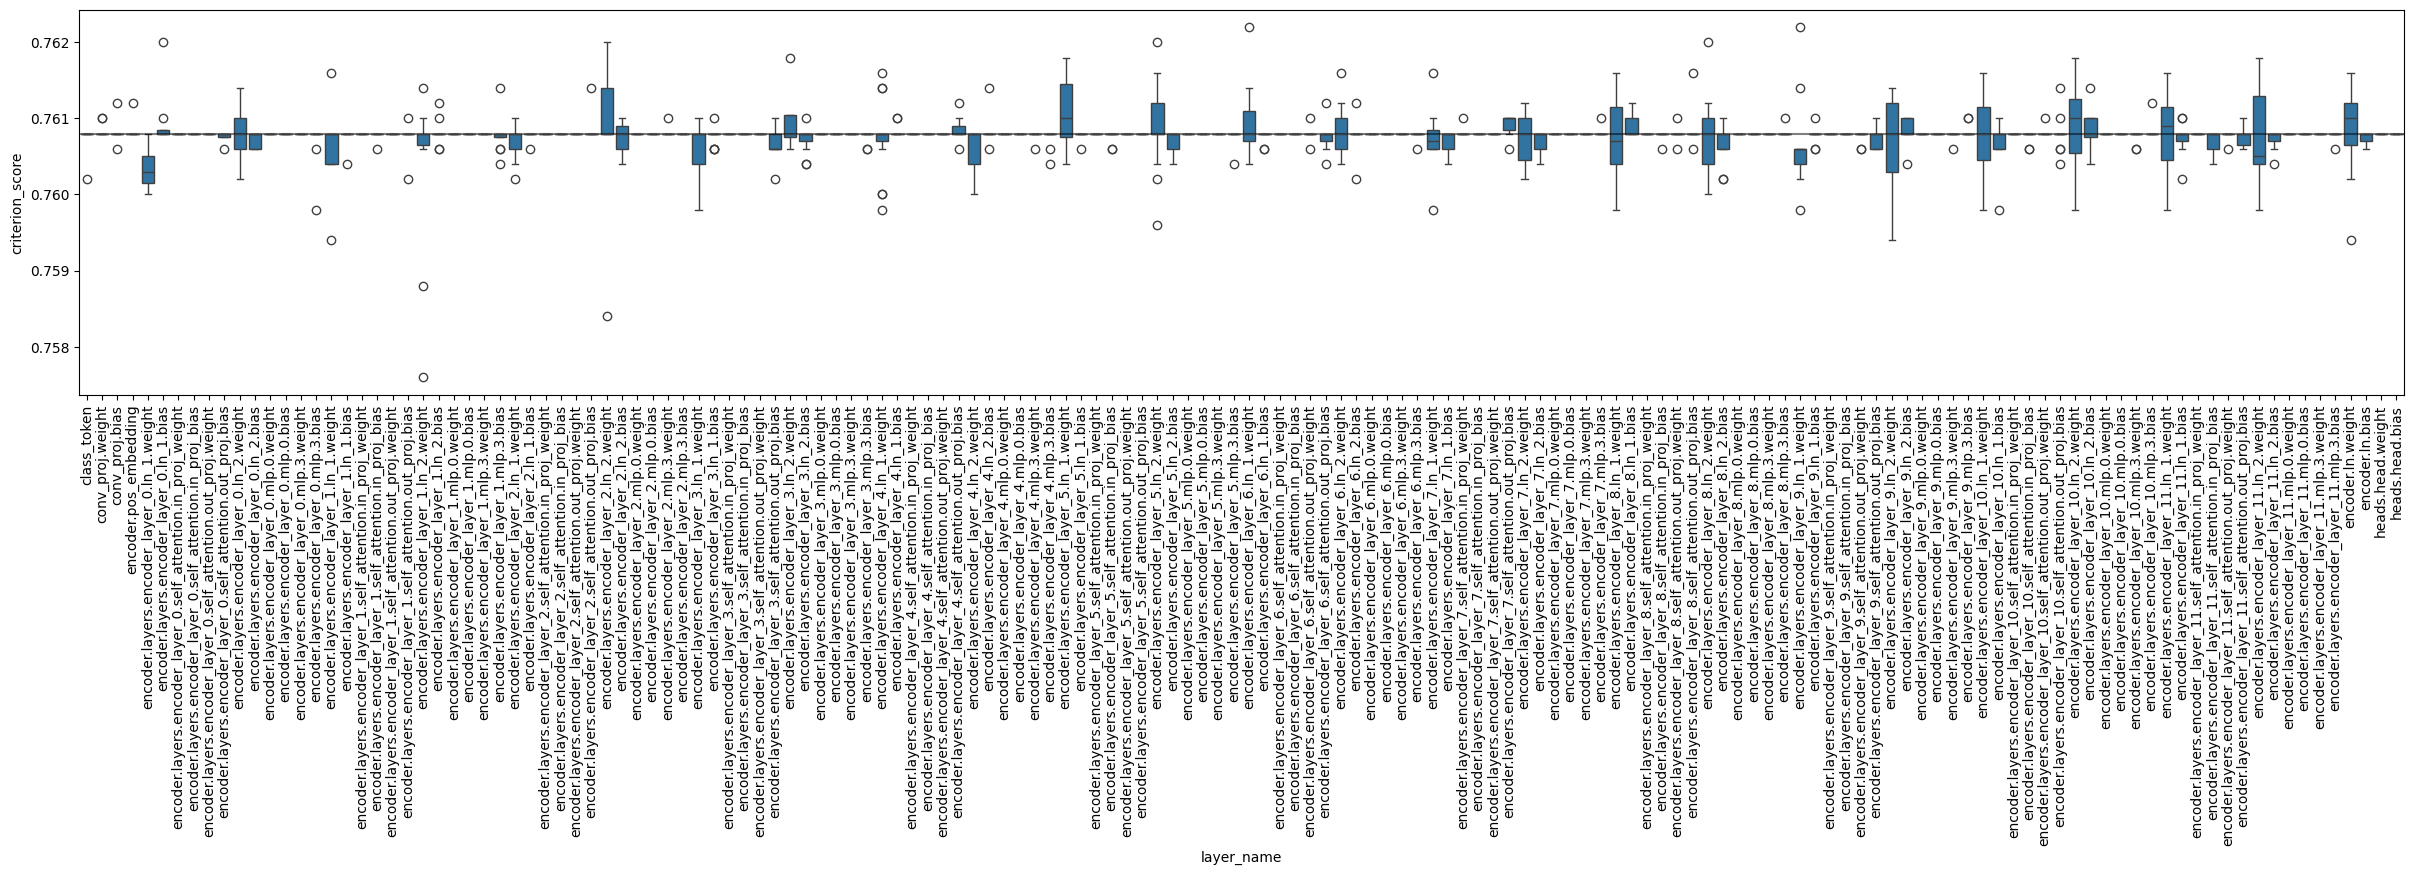

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (30,5))
sns.boxplot(data = df, x = "layer_name", y = "criterion_score")
plt.axhline(0.7608, label = "baseline accuracy", alpha = 0.5, c = "black")
plt.xticks(rotation = 90)
plt.show()

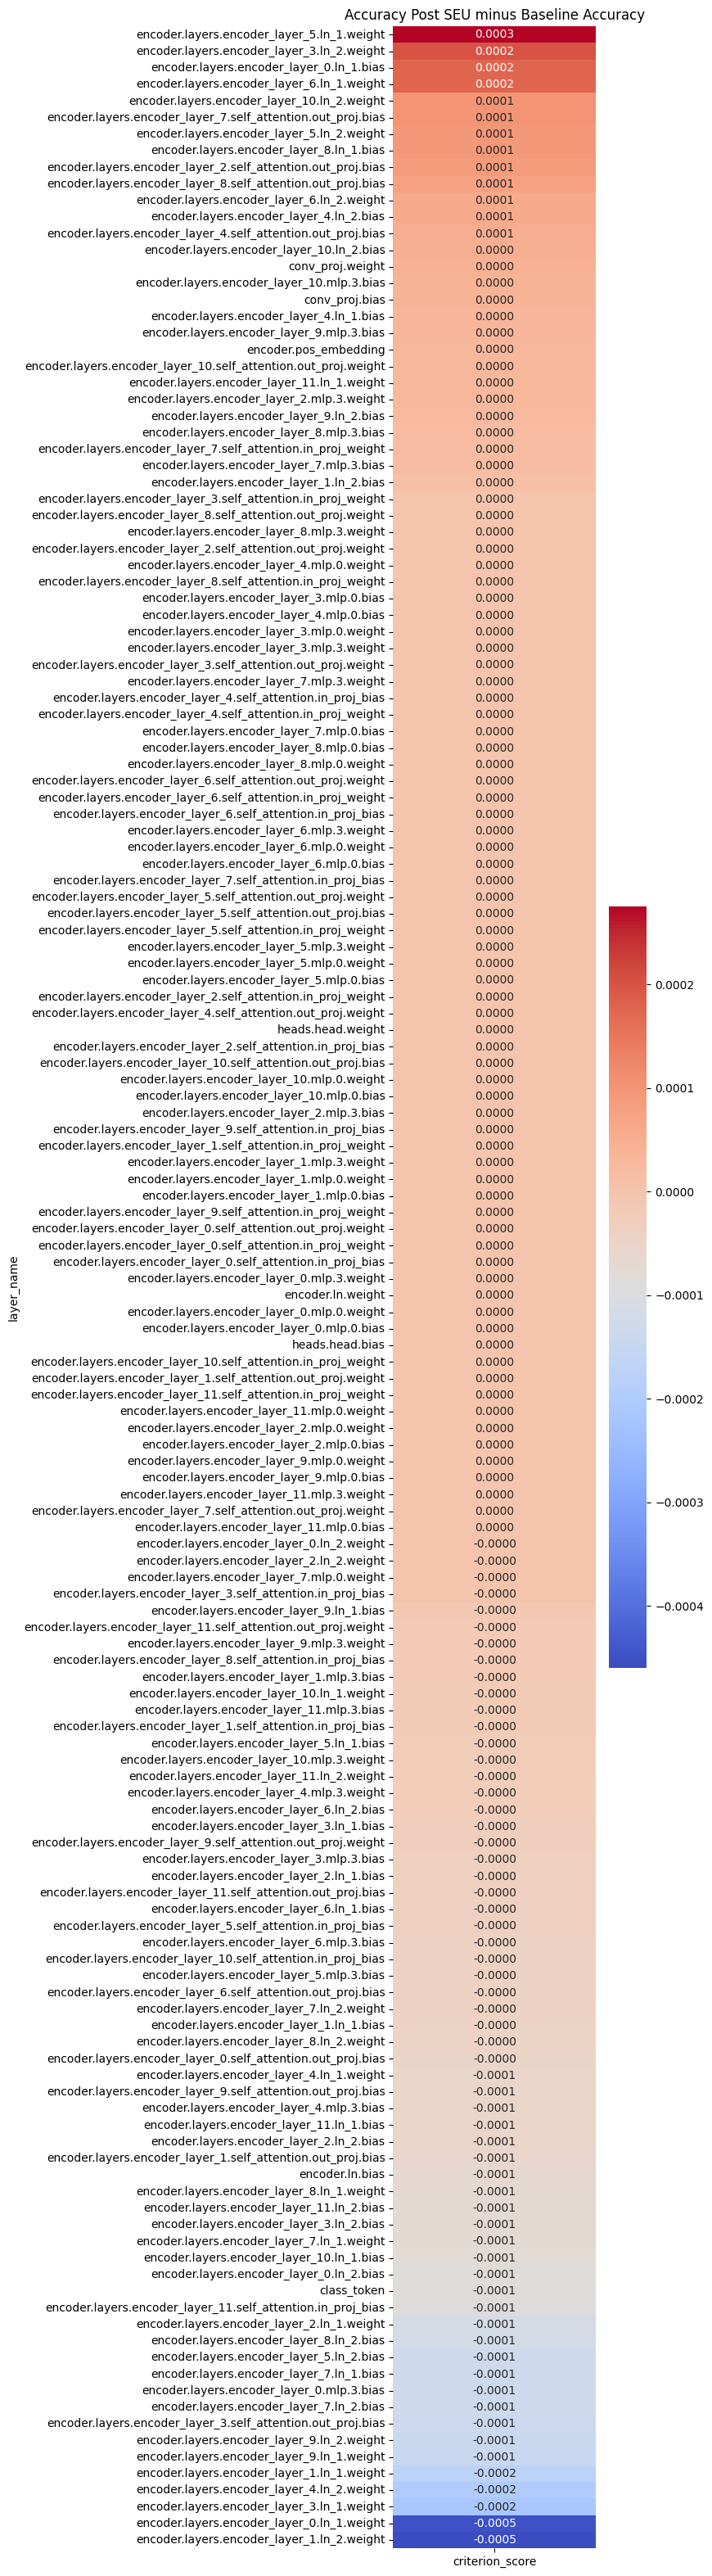

In [20]:
pivot = df.pivot_table(index="layer_name", values="criterion_score", aggfunc="mean").sort_values(by="criterion_score", ascending=False) - 0.7608
plt.figure(figsize=(4,40))
sns.heatmap(pivot, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Accuracy Post SEU minus Baseline Accuracy")
plt.show()



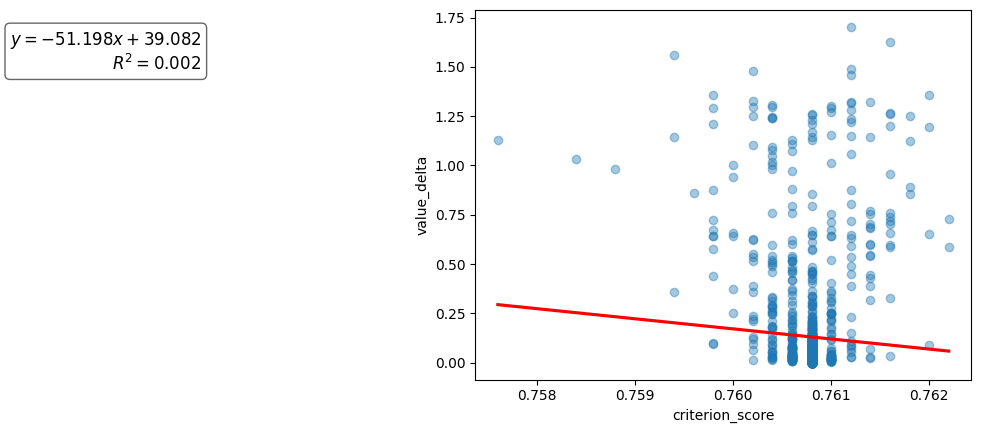

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(df["criterion_score"], df["value_delta"])

# Plot with regression line
sns.regplot(
    data=df,
    x="criterion_score",
    y="value_delta",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"},
    ci=None
)

# Annotate with regression equation and R²
plt.text(
    0.99 * df["criterion_score"].max(),  # X-position
    0.99 * df["value_delta"].max(),      # Y-position
    f"$y = {slope:.3f}x + {intercept:.3f}$\n$R^2 = {r_value**2:.3f}$",
    horizontalalignment='right',
    verticalalignment='top',
    fontsize=12,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.6)
)

plt.show()


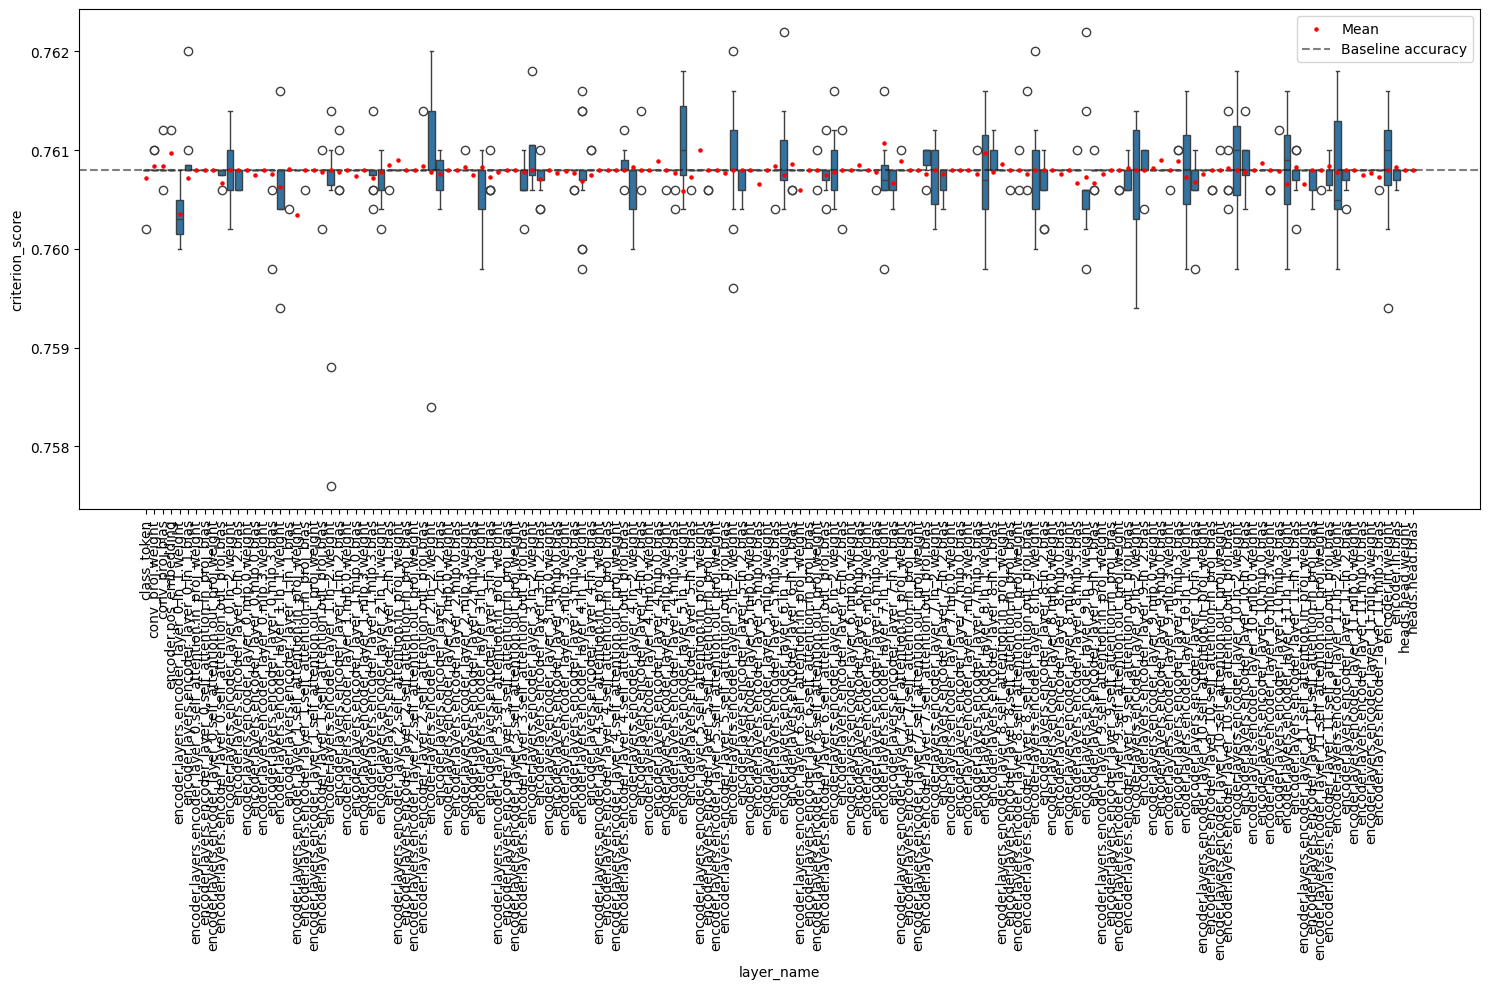

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="layer_name", y="criterion_score")

# Overlay mean scores
mean_scores = df.groupby("layer_name")["criterion_score"].mean()
plt.scatter(x=range(len(mean_scores)), y=mean_scores.values, color='red', label='Mean', zorder=10, s = 5)

plt.axhline(0.7608, label="Baseline accuracy", alpha=0.5, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
